In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

In [2]:
def antithetic_model_d(U, t, repression=False, degradation=False, alpha = 1, theta_1 = 1, gamma_p = 1, mu_1 = 1, eta = 1, mu_2 = 2, theta_2 = 1, gamma_c = 1, d = 1):
    
    x = U[0]
    z1 = U[1]
    z2 = U[2]
    
    if not degradation:
        gamma_c = 0

    if repression:
        dx = alpha / (theta_1 * z1 + 1) - gamma_p * x + d
        dz1 = mu_1 - eta*z1*z2 - gamma_c * z1 
        dz2 = mu_2/(theta_2 * x + 1) - eta * z1 * z2 - gamma_c * z2
    if not repression:
        alpha = 0
        mu_2 = 0
        dx = theta_1 * z1  - gamma_p * x + d
        dz1 = mu_1 - eta*z1*z2 - gamma_c * z1 
        dz2 = theta_2 * x - eta * z1 * z2 - gamma_c * z2   

    return dx, dz1, dz2


def model_solve(antithetic_model, initial_cond, final_t, t_points, parameters):

    U0 = initial_cond
    ts = np.linspace(0, final_t, t_points)
    
    Us = odeint(antithetic_model, U0, ts, args = parameters)
    return Us, ts

## Equilibrium position
### Activation

In [2]:
def antithetic_model(U, t, repression=False, degradation=False, alpha = 1, theta_1 = 1, gamma_p = 1, mu_1 = 1, eta = 1, mu_2 = 2, theta_2 = 1, gamma_c = 1):
    
    x = U[0]
    z1 = U[1]
    z2 = U[2]
    
    if not degradation:
        gamma_c = 0

    if repression:
        dx = alpha / (theta_1 * z1 + 1) - gamma_p * x 
        dz1 = mu_1 - eta*z1*z2 - gamma_c * z1 
        dz2 = mu_2/(theta_2 * x + 1) - eta * z1 * z2 - gamma_c * z2
    if not repression:
        alpha = 0
        mu_2 = 0
        dx = theta_1 * z1  - gamma_p * x 
        dz1 = mu_1 - eta*z1*z2 - gamma_c * z1 
        dz2 = theta_2 * x - eta * z1 * z2 - gamma_c * z2   

    return dx, dz1, dz2


def model_solve(antithetic_model, initial_cond, final_t, t_points, parameters):

    U0 = initial_cond
    ts = np.linspace(0, final_t, t_points)
    
    Us = odeint(antithetic_model, U0, ts, args = parameters)
    return Us, ts

In [3]:
parameter_grid = []

samples = 100

gamma_c_range = np.linspace(0,0.001,samples)

for sample in range(samples):
    alpha = 10/60 #np.random.uniform(0, 2)
    theta_1 = 0.005 #np.random.uniform(0, 2)
    gamma_p =  0.00038 #np.random.uniform(0, 2)
    eta = 0.018/60 #np.random.uniform(0, 2)
    mu_2 = 1.5
    mu_1 = 0.7
    theta_2 = 0.0005 #np.random.uniform(0, 2)
    gamma_c = gamma_c_range[sample] #np.random.uniform(0, 2)


    parameters_sample = (
        False, 
        True, 
        alpha, 
        theta_1, 
        gamma_p, 
        mu_1, 
        eta, 
        mu_2, 
        theta_2, 
        gamma_c)
    parameter_grid.append(parameters_sample)
    
    
init_guess = [0.000001,0.000001,0.000001]
final_t = 2000000
t_points = 10000

In [4]:
gamma_c = []
x_eq = []
z1_eq = []
z2_eq = []
Us_x = []
Us_z1 = []
Us_z2 = []
for parameters in parameter_grid:
    Us, ts = model_solve(antithetic_model, init_guess, final_t, t_points, parameters)
    for k in range(len(Us)):
        Us_x.append(Us[k][0])
        Us_z1.append(Us[k][1])
        Us_z2.append(Us[k][2])

    x_eq.append(Us_x[-1])
    z1_eq.append(Us_z1[-1])
    z2_eq.append(Us_z2[-1])
    gamma_c.append(parameters[-1])
    

    

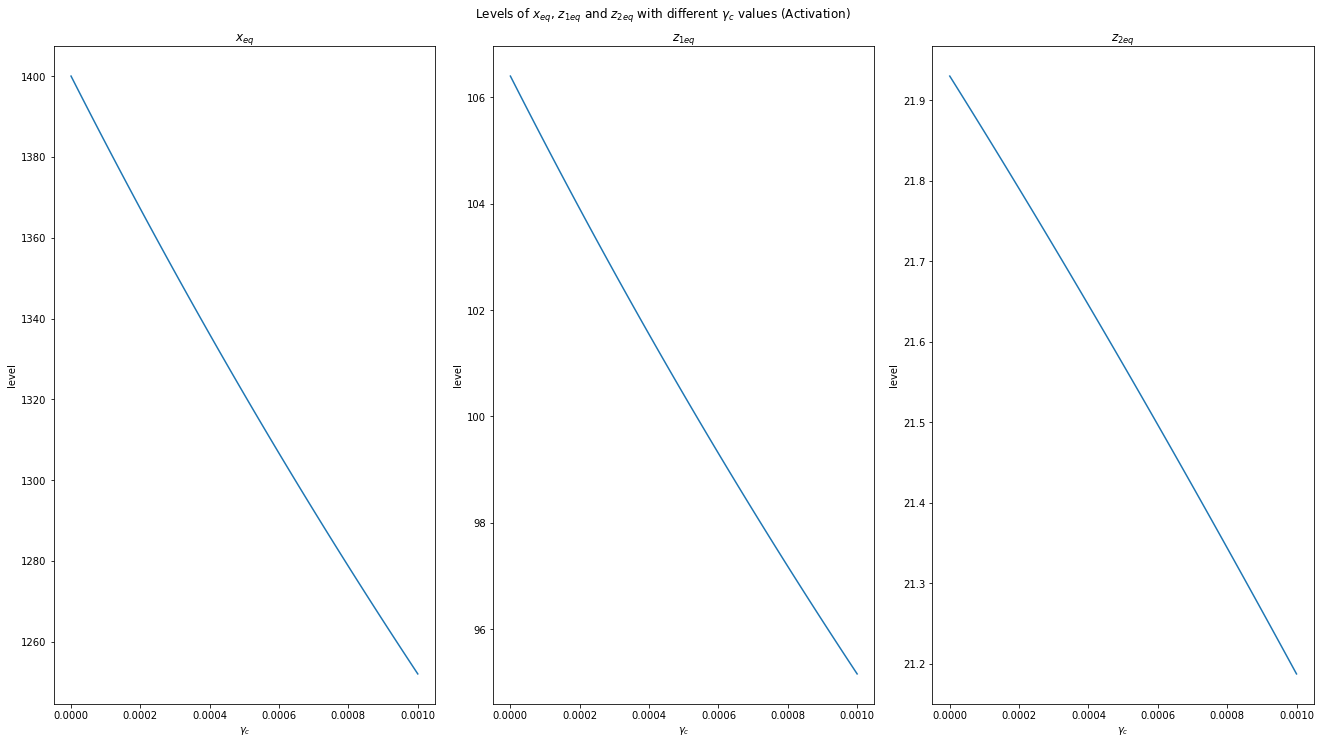

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Levels of $x_{eq}$, $z_{1eq}$ and $z_{2eq}$ with different $\gamma_c$ values (Activation)')
ax1.plot(gamma_c, x_eq)
ax1.set_title('$x_{eq}$')
ax1.set_xlabel("$\gamma_c$")
ax1.set_ylabel('level')
ax2.plot(gamma_c, z1_eq)
ax2.set_title('$z_{1eq}$')
ax2.set_xlabel("$\gamma_c$")
ax2.set_ylabel('level')
ax3.plot(gamma_c, z2_eq)
ax3.set_title('$z_{2eq}$')
ax3.set_xlabel("$\gamma_c$")
ax3.set_ylabel('level')
fig.show
plt.tight_layout()
plt.savefig("activation_equilibrium.svg", bbox_inches = "tight")

### Repression

In [6]:
parameter_grid_rep = []

samples = 50

gamma_c_range = np.linspace(0,0.001,samples)

for sample in range(samples):
    alpha = 10/60 #np.random.uniform(0, 2)
    theta_1 = 0.05 #np.random.uniform(0, 2)
    gamma_p =  0.00038 #np.random.uniform(0, 2)
    eta = 0.018/60 #np.random.uniform(0, 2)
    mu_2 = 1.5
    mu_1 = 0.7
    theta_2 = 0.005 #np.random.uniform(0, 2)
    gamma_c = gamma_c_range[sample] #np.random.uniform(0, 2)


    parameters_sample = (
        True, 
        True, 
        alpha, 
        theta_1, 
        gamma_p, 
        mu_1, 
        eta, 
        mu_2, 
        theta_2, 
        gamma_c)
    parameter_grid_rep.append(parameters_sample)
    
    
init_guess = [0.000001,0.000001,0.000001]
final_t = 2000000
t_points = 1000000

In [7]:
gamma_c = []
x_eq_rep = []
z1_eq_rep = []
z2_eq_rep = []
Us_x_rep = []
Us_z1_rep = []
Us_z2_rep = []

for parameters in parameter_grid_rep:
    Us_rep, ts = model_solve(antithetic_model, init_guess, final_t, t_points, parameters)
    for k in range(len(Us_rep)):
        Us_x_rep.append(Us_rep[k][0])
        Us_z1_rep.append(Us_rep[k][1])
        Us_z2_rep.append(Us_rep[k][2])
    x_eq_rep.append(Us_x_rep[-1])
    z1_eq_rep.append(Us_z1_rep[-1])
    z2_eq_rep.append(Us_z2_rep[-1])
    gamma_c.append(parameters[-1])

    

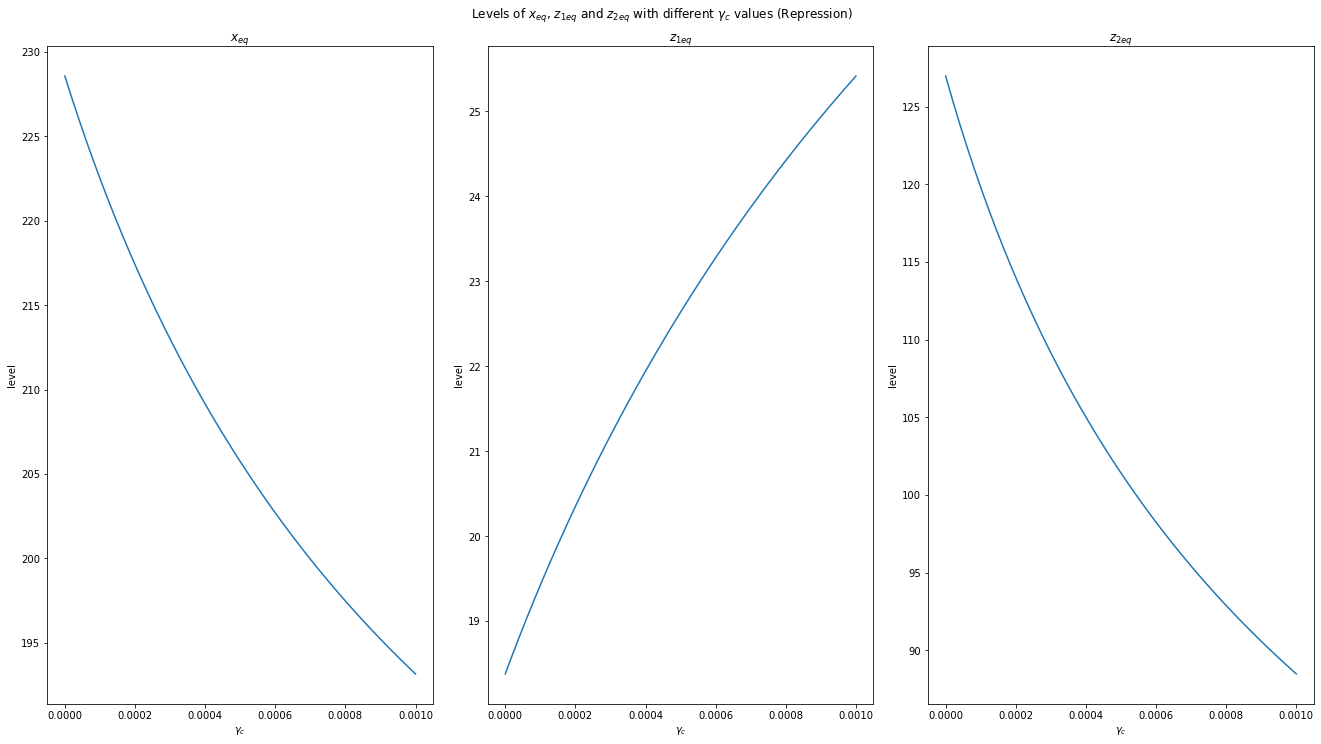

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Levels of $x_{eq}$, $z_{1eq}$ and $z_{2eq}$ with different $\gamma_c$ values (Repression)')
ax1.plot(gamma_c, x_eq_rep)
ax1.set_title('$x_{eq}$')
ax1.set_xlabel("$\gamma_c$")
ax1.set_ylabel('level')
ax2.plot(gamma_c, z1_eq_rep)
ax2.set_title('$z_{1eq}$')
ax2.set_xlabel("$\gamma_c$")
ax2.set_ylabel('level')
ax3.plot(gamma_c, z2_eq_rep)
ax3.set_title('$z_{2eq}$')
ax3.set_xlabel("$\gamma_c$")
ax3.set_ylabel('level')
fig.show
plt.tight_layout()
plt.savefig("repression_equilibrium.svg", bbox_inches = "tight")

## Activation System response (Non-degradation)

Text(0.5, 1.0, 'System Response with d = 0.00375 (Activation, non-degradation)')

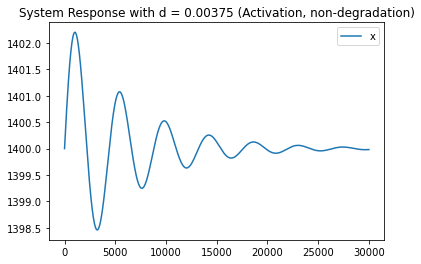

In [3]:

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.005 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.0005 #np.random.uniform(0, 2)
gamma_c = 0 #np.random.uniform(0, 2)
d = 0.75*theta_1
#d = 0.5
#d = 0

x_eq_0_nodeg = mu_1/theta_2
z1_eq_0_nodeg = gamma_p * mu_1/(theta_1 * theta_2)
z2_eq_0_nodeg = theta_1 * theta_2 / (eta * gamma_p)


parameters_sample = (
    False, 
    False, 
    alpha, 
    theta_1, 
    gamma_p, 
    mu_1, 
    eta, 
    mu_2, 
    theta_2, 
    gamma_c,
    d)

initial_cond = [x_eq_0_nodeg, z1_eq_0_nodeg, z2_eq_0_nodeg]
final_t = 30000
t_points = 5000
Us, ts = model_solve(antithetic_model_d, initial_cond, final_t, t_points, parameters_sample)

Us_act_nodeg_x = []
Us_act_nodeg_z1 = []
Us_act_nodeg_z2 = []

for k in range(len(Us)):
    Us_act_nodeg_x.append(Us[k][0])
    Us_act_nodeg_z1.append(Us[k][1])
    Us_act_nodeg_z2.append(Us[k][2])
    
plt.plot(ts, Us_act_nodeg_x, label = 'x')
#plt.plot(ts, Us_z1, label = 'z1')
#plt.plot(ts, Us_z2, label = 'z2')
plt.legend()
plt.title(f'System Response with d = {0.75*theta_1} (Activation, non-degradation)')

Text(0.5, 1.0, 'System Response with d = 0.5 (Activation, non-degradation)')

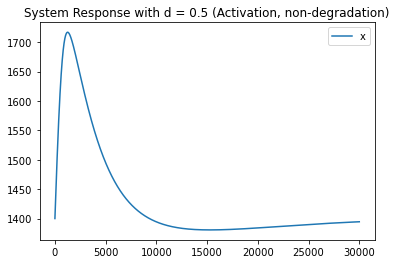

In [4]:

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.005 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.0005 #np.random.uniform(0, 2)
gamma_c = 0 #np.random.uniform(0, 2)
d = 0.5
#d = 0

x_eq_0_nodeg = mu_1/theta_2
z1_eq_0_nodeg = gamma_p * mu_1/(theta_1 * theta_2)
z2_eq_0_nodeg = theta_1 * theta_2 / (eta * gamma_p)


parameters_sample = (
    False, 
    False, 
    alpha, 
    theta_1, 
    gamma_p, 
    mu_1, 
    eta, 
    mu_2, 
    theta_2, 
    gamma_c,
    d)

initial_cond = [x_eq_0_nodeg, z1_eq_0_nodeg, z2_eq_0_nodeg]
final_t = 30000
t_points = 5000
Us, ts_nodeg = model_solve(antithetic_model_d, initial_cond, final_t, t_points, parameters_sample)

Us_act_nodeg_x = []
Us_act_nodeg_z1 = []
Us_act_nodeg_z2 = []

for k in range(len(Us)):
    Us_act_nodeg_x.append(Us[k][0])
    Us_act_nodeg_z1.append(Us[k][1])
    Us_act_nodeg_z2.append(Us[k][2])
    
plt.plot(ts_nodeg, Us_act_nodeg_x, label = 'x')
#plt.plot(ts, Us_z1, label = 'z1')
#plt.plot(ts, Us_z2, label = 'z2')
plt.legend()
plt.title('System Response with d = 0.5 (Activation, non-degradation)')

Let's change d!

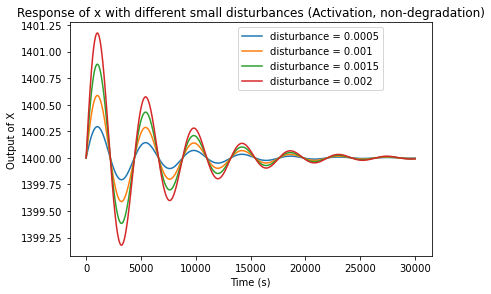

In [5]:

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.005 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.0005 #np.random.uniform(0, 2)
gamma_c = 0 #np.random.uniform(0, 2)


x_eq_0 = mu_1/theta_2
z1_eq_0 = gamma_p * mu_1/(theta_1 * theta_2)
z2_eq_0 = theta_1 * theta_2 / (eta * gamma_p)
#plt.figure(figsize=(5, 5))  

for i in range(1,5,1):
    d = i/10*theta_1
    #d = 0




    parameters_sample = (
        False, 
        False, 
        alpha, 
        theta_1, 
        gamma_p, 
        mu_1, 
        eta, 
        mu_2, 
        theta_2, 
        gamma_c,
        d)

    initial_cond = [x_eq_0, z1_eq_0, z2_eq_0]
    final_t = 30000
    t_points = 5000
    Us, ts = model_solve(antithetic_model_d, initial_cond, final_t, t_points, parameters_sample)

    Us_x = []
    Us_z1 = []
    Us_z2 = []

    for k in range(len(Us)):
        Us_x.append(Us[k][0])
        Us_z1.append(Us[k][1])
        Us_z2.append(Us[k][2])

    plt.plot(ts, Us_x, label = f'disturbance = {i/10*theta_1}')
    #plt.plot(ts, Us_z1, label = 'z1')
    #plt.plot(ts, Us_z2, label = 'z2')
    plt.legend()
    plt.title("Response of x with different small disturbances (Activation, non-degradation)")
    plt.legend(bbox_to_anchor=(0.45,1))
    plt.tight_layout()
plt.ylabel('Output of X')
plt.xlabel('Time (s)')
plt.savefig("act_nondeg_response_d_small.svg", bbox_inches = "tight")


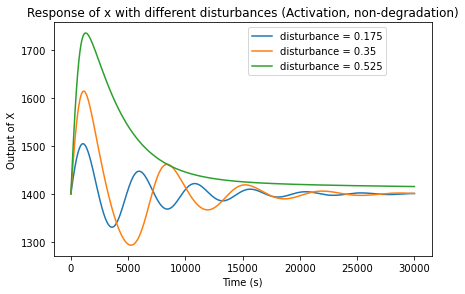

In [6]:

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.005 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.0005 #np.random.uniform(0, 2)
gamma_c = 0 #np.random.uniform(0, 2)


x_eq_0 = mu_1/theta_2
z1_eq_0 = gamma_p * mu_1/(theta_1 * theta_2)
z2_eq_0 = theta_1 * theta_2 / (eta * gamma_p)


for i in range(1,4,1):
    d = i/10*1.75
    #d = 0




    parameters_sample = (
        False, 
        False, 
        alpha, 
        theta_1, 
        gamma_p, 
        mu_1, 
        eta, 
        mu_2, 
        theta_2, 
        gamma_c,
        d)

    initial_cond = [x_eq_0, z1_eq_0, z2_eq_0]
    final_t = 30000
    t_points = 5000
    Us, ts = model_solve(antithetic_model_d, initial_cond, final_t, t_points, parameters_sample)

    Us_x = []
    Us_z1 = []
    Us_z2 = []

    for k in range(len(Us)):
        Us_x.append(Us[k][0])
        Us_z1.append(Us[k][1])
        Us_z2.append(Us[k][2])

    plt.plot(ts, Us_x, label = f'disturbance = {i*1.75/10}')
    #plt.plot(ts, Us_z1, label = 'z1')
    #plt.plot(ts, Us_z2, label = 'z2')
    plt.legend()
    plt.title("Response of x with different disturbances (Activation, non-degradation)")
    plt.legend(bbox_to_anchor=(0.5,1.0))
    plt.tight_layout()
plt.ylabel('Output of X')
plt.xlabel('Time (s)')    
plt.savefig("./write_up_svg/act_nodeg_response_d.svg", bbox_inches = "tight")
plt.savefig("./write_up_svg/act_nodeg_response_d.png", bbox_inches = "tight")

## Activation integrator (non-degradation)

In [7]:
def antithetic_model_integrator(U, t, repression=False, degradation=False, alpha = 1, theta_1 = 1, gamma_p = 1, mu_1 = 1, eta = 1, mu_2 = 2, theta_2 = 1, gamma_c = 1, d = 1):
    
    x = U[0]
    q1 = U[1]
    q2 = U[2]
    
    if not degradation:
        gamma_c = 0

    if repression:
        dx = alpha / (theta_1 * (q1+q2)/2 + 1) - gamma_p * x + d
        dq1 = mu_1 - mu_2/(theta_2*x+1) - gamma_c*q1
        dq2 = mu_1 + mu_2/(theta_2*x+1) - eta/2*(q2**2 - q1**2) - gamma_c*q2
    if not repression:
        alpha = 0
        mu_2 = 0
        dx = theta_1 * (q1 + q2)/2 - gamma_p*x + d 
        dq1 = mu_1 - theta_2*x - gamma_c*q1
        dq2 = mu_1 + theta_2*x - eta/2*(q2**2 - q1**2) - gamma_c*q2

    return dx, dq1, dq2


def model_solve(antithetic_model, initial_cond, final_t, t_points, parameters):

    U0 = initial_cond
    ts = np.linspace(0, final_t, t_points)
    
    Us = odeint(antithetic_model, U0, ts, args = parameters)
    return Us, ts

Text(0.5, 1.0, 'Integrator with d = 0.5*$\\theta_1$ (Activation, non-degradation)')

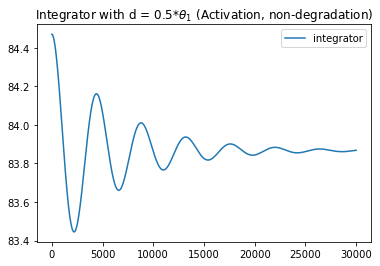

In [8]:

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.005 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.0005 #np.random.uniform(0, 2)
gamma_c = 0 #np.random.uniform(0, 2)
d = 0.5*theta_1
#d = 0

x_eq_0 = mu_1/theta_2
z1_eq_0 = gamma_p * mu_1/(theta_1 * theta_2)
z2_eq_0 = theta_1 * theta_2 / (eta * gamma_p)
q1_eq_0 = z1_eq_0 - z2_eq_0
q2_eq_0 = z1_eq_0 + z2_eq_0

parameters_sample = (
    False, 
    False, 
    alpha, 
    theta_1, 
    gamma_p, 
    mu_1, 
    eta, 
    mu_2, 
    theta_2, 
    gamma_c,
    d)

initial_cond = [x_eq_0, q1_eq_0, q2_eq_0]
final_t = 30000
t_points = 50000
Us, ts = model_solve(antithetic_model_integrator, initial_cond, final_t, t_points, parameters_sample)

Us_x = []
Us_q1 = []
Us_q2 = []

for k in range(len(Us)):
    Us_x.append(Us[k][0])
    Us_q1.append(Us[k][1])
    Us_q2.append(Us[k][2])
    
#plt.plot(ts, Us_x, label = 'x')
plt.plot(ts, Us_q1, label = 'integrator')
#plt.plot(ts, Us_q2, label = 'q2')
plt.legend()
plt.title('Integrator with d = 0.5*$\\theta_1$ (Activation, non-degradation)')

Let's change d!

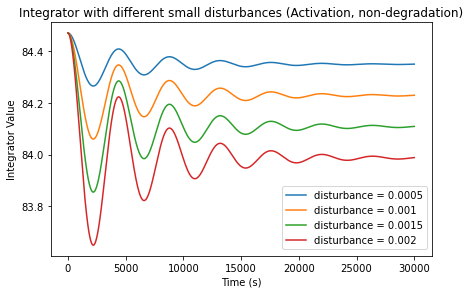

In [9]:

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.005 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.0005 #np.random.uniform(0, 2)
gamma_c = 0 #np.random.uniform(0, 2)
for i in range(1,5,1):
    d = i/10*theta_1
    #d = 0

    x_eq_0 = mu_1/theta_2
    z1_eq_0 = gamma_p * mu_1/(theta_1 * theta_2)
    z2_eq_0 = theta_1 * theta_2 / (eta * gamma_p)
    q1_eq_0 = z1_eq_0 - z2_eq_0
    q2_eq_0 = z1_eq_0 + z2_eq_0

    parameters_sample = (
        False, 
        False, 
        alpha, 
        theta_1, 
        gamma_p, 
        mu_1, 
        eta, 
        mu_2, 
        theta_2, 
        gamma_c,
        d)

    initial_cond = [x_eq_0, q1_eq_0, q2_eq_0]
    final_t = 30000
    t_points = 50000
    Us, ts = model_solve(antithetic_model_integrator, initial_cond, final_t, t_points, parameters_sample)

    Us_x = []
    Us_q1 = []
    Us_q2 = []

    for k in range(len(Us)):
        Us_x.append(Us[k][0])
        Us_q1.append(Us[k][1])
        Us_q2.append(Us[k][2])

    #plt.plot(ts, Us_x, label = 'x')
    plt.plot(ts, Us_q1, label = f'disturbance = {i/10*theta_1}')
    #plt.plot(ts, Us_q2, label = 'q2')
    plt.title("Integrator with different small disturbances (Activation, non-degradation)")
    plt.legend(bbox_to_anchor=(1,0.32))
    plt.tight_layout()
plt.ylabel('Integrator Value')
plt.xlabel('Time (s)')
plt.savefig("./write_up_svg/act_nodeg_integrator_d_small.svg", bbox_inches = "tight")    
plt.savefig("./write_up_svg/act_nodeg_integrator_d_small.png", bbox_inches = "tight")   

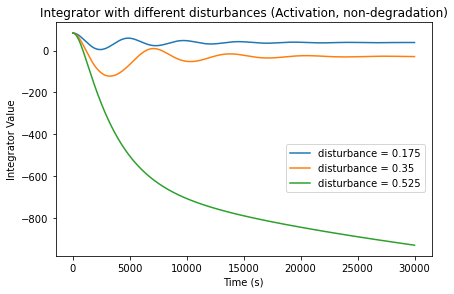

In [10]:

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.005 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.0005 #np.random.uniform(0, 2)
gamma_c = 0 #np.random.uniform(0, 2)
for i in range(1,4,1):
    d = i/10*1.75
    #d = 0

    x_eq_0 = mu_1/theta_2
    z1_eq_0 = gamma_p * mu_1/(theta_1 * theta_2)
    z2_eq_0 = theta_1 * theta_2 / (eta * gamma_p)
    q1_eq_0 = z1_eq_0 - z2_eq_0
    q2_eq_0 = z1_eq_0 + z2_eq_0

    parameters_sample = (
        False, 
        False, 
        alpha, 
        theta_1, 
        gamma_p, 
        mu_1, 
        eta, 
        mu_2, 
        theta_2, 
        gamma_c,
        d)

    initial_cond = [x_eq_0, q1_eq_0, q2_eq_0]
    final_t = 30000
    t_points = 50000
    Us, ts = model_solve(antithetic_model_integrator, initial_cond, final_t, t_points, parameters_sample)

    Us_x = []
    Us_q1 = []
    Us_q2 = []

    for k in range(len(Us)):
        Us_x.append(Us[k][0])
        Us_q1.append(Us[k][1])
        Us_q2.append(Us[k][2])

    #plt.plot(ts, Us_x, label = 'x')
    d_show = i/10*1.75
    d_show = round(d_show,3)
    plt.plot(ts, Us_q1, label = f'disturbance = {d_show}')
    #plt.plot(ts, Us_q2, label = 'q2')
    plt.title("Integrator with different disturbances (Activation, non-degradation)")
    plt.legend(bbox_to_anchor=(0.6,0.5))
    plt.tight_layout()
plt.ylabel('Integrator Value')
plt.xlabel('Time (s)')
plt.savefig("./write_up_svg/act_nodeg_integrator_d.svg", bbox_inches = "tight")   
plt.savefig("./write_up_svg/act_nodeg_integrator_d.png", bbox_inches = "tight")  

## Activation system response (Degradation)

Text(0.5, 1.0, 'System Response with d = 0.75*$\\theta_1$ (Activation, degradation)')

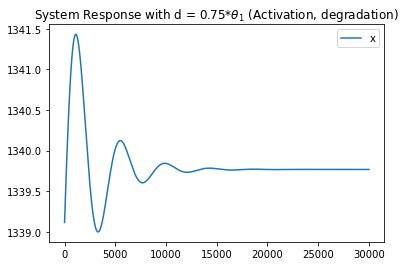

In [11]:


x_eq_00038 = 1339.114566237159
z1_eq_00038 = 101.772696976846
z2_eq_00038 = 21.66024249388398

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.005 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.0005 #np.random.uniform(0, 2)
gamma_c = gamma_p #np.random.uniform(0, 2)
#d = 0.5*theta_1
d = 0.75*theta_1


parameters_sample = (
    False, 
    True, 
    alpha, 
    theta_1, 
    gamma_p, 
    mu_1, 
    eta, 
    mu_2, 
    theta_2, 
    gamma_c,
    d)

initial_cond = [x_eq_00038, z1_eq_00038, z2_eq_00038]
final_t = 30000
t_points = 5000
Us, ts = model_solve(antithetic_model_d, initial_cond, final_t, t_points, parameters_sample)

Us_act_deg_x = []
Us_act_deg_z1 = []
Us_act_deg_z2 = []

for k in range(len(Us)):
    Us_act_deg_x.append(Us[k][0])
    Us_act_deg_z1.append(Us[k][1])
    Us_act_deg_z2.append(Us[k][2])
    
plt.plot(ts, Us_act_deg_x, label = 'x')
#plt.plot(ts, Us_z1, label = 'z1')
#plt.plot(ts, Us_z2, label = 'z2')
plt.legend()
plt.title('System Response with d = 0.75*$\\theta_1$ (Activation, degradation)')

Text(0.5, 1.0, 'System Response with d = 0.5 (Activation, degradation)')

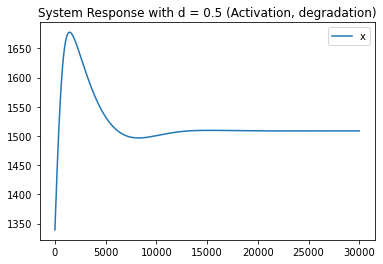

In [12]:


x_eq_00038 = 1339.114566237159
z1_eq_00038 = 101.772696976846
z2_eq_00038 = 21.66024249388398

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.005 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.0005 #np.random.uniform(0, 2)
gamma_c = gamma_p #np.random.uniform(0, 2)
#d = 0.5*theta_1
d = 0.5


parameters_sample = (
    False, 
    True, 
    alpha, 
    theta_1, 
    gamma_p, 
    mu_1, 
    eta, 
    mu_2, 
    theta_2, 
    gamma_c,
    d)

initial_cond = [x_eq_00038, z1_eq_00038, z2_eq_00038]
final_t = 30000
t_points = 5000
Us, ts_deg = model_solve(antithetic_model_d, initial_cond, final_t, t_points, parameters_sample)

Us_act_deg_x = []
Us_act_deg_z1 = []
Us_act_deg_z2 = []

for k in range(len(Us)):
    Us_act_deg_x.append(Us[k][0])
    Us_act_deg_z1.append(Us[k][1])
    Us_act_deg_z2.append(Us[k][2])
    
plt.plot(ts_deg, Us_act_deg_x, label = 'x')
#plt.plot(ts, Us_z1, label = 'z1')
#plt.plot(ts, Us_z2, label = 'z2')
plt.legend()
plt.title('System Response with d = 0.5 (Activation, degradation)')


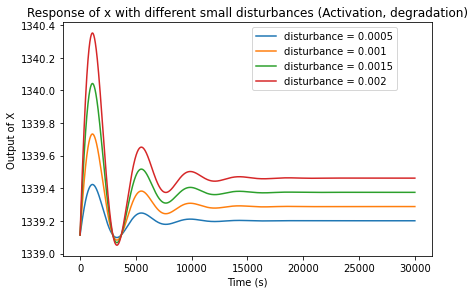

In [13]:


x_eq_00038 = 1339.114566237159
z1_eq_00038 = 101.772696976846
z2_eq_00038 = 21.66024249388398

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.005 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.0005 #np.random.uniform(0, 2)
gamma_c = gamma_p #np.random.uniform(0, 2)


for i in range(1,5,1):
    d = i/10*theta_1


    parameters_sample = (
        False, 
        True, 
        alpha, 
        theta_1, 
        gamma_p, 
        mu_1, 
        eta, 
        mu_2, 
        theta_2, 
        gamma_c,
        d)

    initial_cond = [x_eq_00038, z1_eq_00038, z2_eq_00038]
    final_t = 30000
    t_points = 5000
    Us, ts = model_solve(antithetic_model_d, initial_cond, final_t, t_points, parameters_sample)

    Us_x = []
    Us_z1 = []
    Us_z2 = []

    for k in range(len(Us)):
        Us_x.append(Us[k][0])
        Us_z1.append(Us[k][1])
        Us_z2.append(Us[k][2])

    plt.plot(ts, Us_x, label = f'disturbance = {i/10*theta_1}')
    #plt.plot(ts, Us_z1, label = 'z1')
    #plt.plot(ts, Us_z2, label = 'z2')
    plt.legend()
    plt.title("Response of x with different small disturbances (Activation, degradation)")
    plt.legend(bbox_to_anchor=(0.5,1))
    plt.tight_layout()
plt.xlabel('Time (s)')
plt.ylabel('Output of X')
plt.savefig("./write_up_svg/act_deg_response_d_small.svg", bbox_inches = "tight")     
plt.savefig("./write_up_svg/act_deg_response_d_small.png", bbox_inches = "tight")  

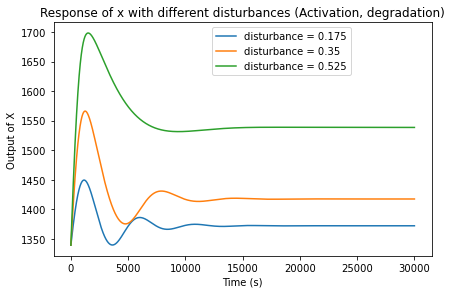

In [14]:


x_eq_00038 = 1339.114566237159
z1_eq_00038 = 101.772696976846
z2_eq_00038 = 21.66024249388398

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.005 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.0005 #np.random.uniform(0, 2)
gamma_c = gamma_p #np.random.uniform(0, 2)


for i in range(1,4,1):
    d = i/10*1.75


    parameters_sample = (
        False, 
        True, 
        alpha, 
        theta_1, 
        gamma_p, 
        mu_1, 
        eta, 
        mu_2, 
        theta_2, 
        gamma_c,
        d)

    initial_cond = [x_eq_00038, z1_eq_00038, z2_eq_00038]
    final_t = 30000
    t_points = 5000
    Us, ts = model_solve(antithetic_model_d, initial_cond, final_t, t_points, parameters_sample)

    Us_x = []
    Us_z1 = []
    Us_z2 = []

    for k in range(len(Us)):
        Us_x.append(Us[k][0])
        Us_z1.append(Us[k][1])
        Us_z2.append(Us[k][2])
    d_show = i/10*1.75
    d_show = round(d_show,3)
    plt.plot(ts, Us_x, label = f'disturbance = {d_show}')
    #plt.plot(ts, Us_z1, label = 'z1')
    #plt.plot(ts, Us_z2, label = 'z2')
    plt.legend()
    plt.title("Response of x with different disturbances (Activation, degradation)")
    plt.legend(bbox_to_anchor=(0.8,1))
    plt.tight_layout()
plt.xlabel('Time (s)')
plt.ylabel('Output of X')
plt.savefig("./write_up_svg/act_deg_response_d.svg", bbox_inches = "tight")
plt.savefig("./write_up_svg/act_deg_response_d.png", bbox_inches = "tight")

## Activation integrator (degradation)

Text(0.5, 1.0, 'Integrator with d = 0.5*$\\theta_1$ (Activation, degradation)')

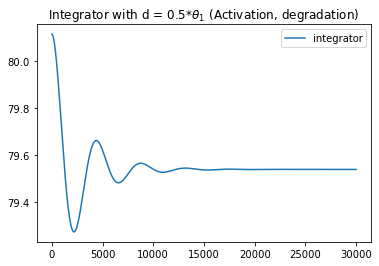

In [15]:

x_eq_00038 = 1339.114566237159
z1_eq_00038 = 101.772696976846
z2_eq_00038 = 21.66024249388398
q1_eq_00038 = z1_eq_00038 - z2_eq_00038
q2_eq_00038 = z1_eq_00038 + z2_eq_00038


alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.005 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.0005 #np.random.uniform(0, 2)
gamma_c = gamma_p #np.random.uniform(0, 2)
#d = 0.5*theta_1
d = 0.5*theta_1

parameters_sample = (
    False, 
    True, 
    alpha, 
    theta_1, 
    gamma_p, 
    mu_1, 
    eta, 
    mu_2, 
    theta_2, 
    gamma_c,
    d)

initial_cond = [x_eq_00038, q1_eq_00038, q2_eq_00038]
final_t = 30000
t_points = 50000
Us, ts = model_solve(antithetic_model_integrator, initial_cond, final_t, t_points, parameters_sample)

Us_x = []
Us_q1 = []
Us_q2 = []

for k in range(len(Us)):
    Us_x.append(Us[k][0])
    Us_q1.append(Us[k][1])
    Us_q2.append(Us[k][2])
    
#plt.plot(ts, Us_x, label = 'x')
plt.plot(ts, Us_q1, label = 'integrator')
#plt.plot(ts, Us_q2, label = 'q2')
plt.legend()
plt.title('Integrator with d = 0.5*$\\theta_1$ (Activation, degradation)')

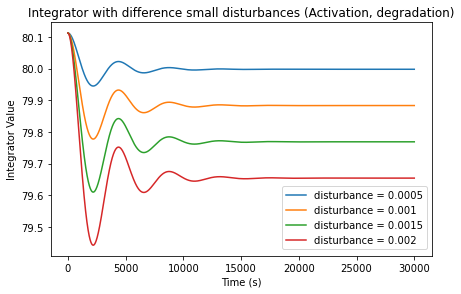

In [16]:

x_eq_00038 = 1339.114566237159
z1_eq_00038 = 101.772696976846
z2_eq_00038 = 21.66024249388398
q1_eq_00038 = z1_eq_00038 - z2_eq_00038
q2_eq_00038 = z1_eq_00038 + z2_eq_00038


alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.005 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.0005 #np.random.uniform(0, 2)
gamma_c = gamma_p #np.random.uniform(0, 2)

for i in range(1,5,1):
    d = i/10*theta_1

    parameters_sample = (
        False, 
        True, 
        alpha, 
        theta_1, 
        gamma_p, 
        mu_1, 
        eta, 
        mu_2, 
        theta_2, 
        gamma_c,
        d)

    initial_cond = [x_eq_00038, q1_eq_00038, q2_eq_00038]
    final_t = 30000
    t_points = 50000
    Us, ts = model_solve(antithetic_model_integrator, initial_cond, final_t, t_points, parameters_sample)

    Us_x = []
    Us_q1 = []
    Us_q2 = []

    for k in range(len(Us)):
        Us_x.append(Us[k][0])
        Us_q1.append(Us[k][1])
        Us_q2.append(Us[k][2])

    #plt.plot(ts, Us_x, label = 'x')
    plt.plot(ts, Us_q1, label = f'disturbance = {i/10*theta_1}')
    #plt.plot(ts, Us_q2, label = 'q2')
    plt.title("Integrator with difference small disturbances (Activation, degradation)")
    plt.legend(bbox_to_anchor=(1,0.32))
    plt.tight_layout()
plt.ylabel('Integrator Value')
plt.xlabel('Time (s)')
plt.savefig("./write_up_svg/act_deg_integrator_d_small.svg", bbox_inches = "tight")    
plt.savefig("./write_up_svg/act_deg_integrator_d_small.png", bbox_inches = "tight")  

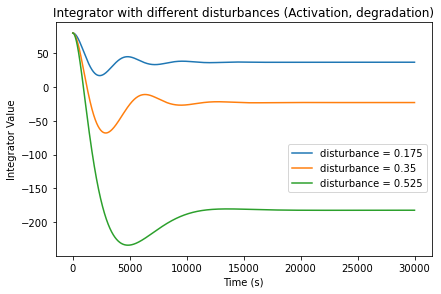

In [17]:

x_eq_00038 = 1339.114566237159
z1_eq_00038 = 101.772696976846
z2_eq_00038 = 21.66024249388398
q1_eq_00038 = z1_eq_00038 - z2_eq_00038
q2_eq_00038 = z1_eq_00038 + z2_eq_00038


alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.005 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.0005 #np.random.uniform(0, 2)
gamma_c = gamma_p #np.random.uniform(0, 2)

for i in range(1,4,1):
    d = i/10*1.75

    parameters_sample = (
        False, 
        True, 
        alpha, 
        theta_1, 
        gamma_p, 
        mu_1, 
        eta, 
        mu_2, 
        theta_2, 
        gamma_c,
        d)

    initial_cond = [x_eq_00038, q1_eq_00038, q2_eq_00038]
    final_t = 30000
    t_points = 50000
    Us, ts = model_solve(antithetic_model_integrator, initial_cond, final_t, t_points, parameters_sample)

    Us_x = []
    Us_q1 = []
    Us_q2 = []

    for k in range(len(Us)):
        Us_x.append(Us[k][0])
        Us_q1.append(Us[k][1])
        Us_q2.append(Us[k][2])

    #plt.plot(ts, Us_x, label = 'x')
    d_show = i/10*1.75
    d_show = round(d_show, 3)
    plt.plot(ts, Us_q1, label = f'disturbance = {d_show}')
    #plt.plot(ts, Us_q2, label = 'q2')
    plt.title("Integrator with different disturbances (Activation, degradation)")
    plt.legend(bbox_to_anchor=(1,0.5))
    plt.tight_layout()
plt.ylabel('Integrator Value')
plt.xlabel('Time (s)')
plt.savefig("./write_up_svg/act_deg_integrator_d.svg", bbox_inches = "tight")    
plt.savefig("./write_up_svg/act_deg_integrator_d.png", bbox_inches = "tight")    

## Activation system response (open loop)

In [ ]:
def open_loop_circuit(U, t, repression=False, degradation=False, alpha = 1, theta_1 = 1, gamma_p = 1, mu_1 = 1, eta = 1, mu_2 = 2, theta_2 = 1, gamma_c = 1, d = 1):
    
    x = U[0]
    z1 = U[1]
    
    if not degradation:
        gamma_c = 0

    if repression:
        dx = alpha/(theta_1*z1+1) - gamma_p * x 
        dz1 = mu_1 - gamma_c * z1 + d
    if not repression:
        alpha = 0
        mu_2 = 0
        dx = theta_1 * z1  - gamma_p * x 
        dz1 = mu_1 - gamma_c * z1 + d
    return dx, dz1


def model_solve(antithetic_model, initial_cond, final_t, t_points, parameters):

    U0 = initial_cond
    ts = np.linspace(0, final_t, t_points)
    
    Us = odeint(antithetic_model, U0, ts, args = parameters)
    return Us, ts

Text(0.5, 1.0, 'System Response with d = 0.75*$\\theta_1$ (Open loop, Activation)')

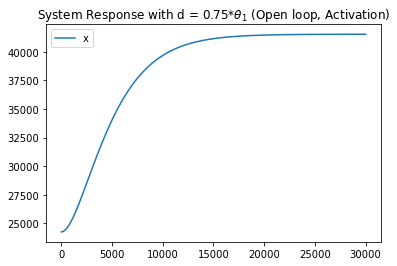

In [ ]:

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.005 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.0005 #np.random.uniform(0, 2)
gamma_c = gamma_p #np.random.uniform(0, 2)
d = 0.5
#d = 0

x_eq_0_open = mu_1/gamma_c*theta_1/gamma_p
z1_eq_0_open = mu_1/gamma_c


parameters_sample = (
    False, 
    True, 
    alpha, 
    theta_1, 
    gamma_p, 
    mu_1, 
    eta, 
    mu_2, 
    theta_2, 
    gamma_c,
    d)

initial_cond = [x_eq_0_open, z1_eq_0_open]
final_t = 30000
t_points = 5000
Us, ts = model_solve(open_loop_circuit, initial_cond, final_t, t_points, parameters_sample)

Us_open_x_circuit = []
Us_open_z1 = []
    
for k in range(len(Us)):
    Us_open_x_circuit.append(Us[k][0])
    Us_open_z1.append(Us[k][1])
    
plt.plot(ts, Us_open_x_circuit, label = 'x')
#plt.plot(ts, Us_open_z1, label = 'z1')
plt.legend()
plt.title('System Response with d = 0.75*$\\theta_1$ (Open loop, Activation)')

<Figure size 720x720 with 0 Axes>

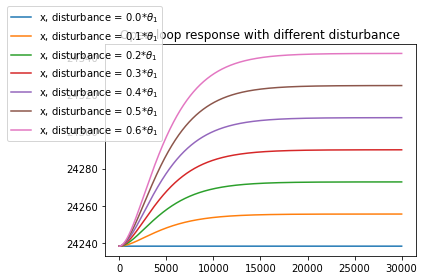

<Figure size 720x720 with 0 Axes>

In [ ]:

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.005 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.0005 #np.random.uniform(0, 2)
gamma_c = gamma_p #np.random.uniform(0, 2)

#d = 0

x_eq_0 = mu_1/gamma_c*theta_1/gamma_p
z1_eq_0 = mu_1/gamma_c
for i in range(7):
    d = i/10*theta_1

    parameters_sample = (
        False, 
        True, 
        alpha, 
        theta_1, 
        gamma_p, 
        mu_1, 
        eta, 
        mu_2, 
        theta_2, 
        gamma_c,
        d)

    initial_cond = [x_eq_0, z1_eq_0]
    final_t = 30000
    t_points = 5000
    Us, ts = model_solve(open_loop_circuit, initial_cond, final_t, t_points, parameters_sample)

    Us_x = []
    Us_z1 = []

    for k in range(len(Us)):
        Us_x.append(Us[k][0])
        Us_z1.append(Us[k][1])

    plt.plot(ts, Us_x, label = f'x, disturbance = {i/10}*$\\theta_1$')
    #plt.plot(ts, Us_z1, label = 'z1')
    plt.title('Open loop response with different disturbance')
    plt.legend(bbox_to_anchor=(0.2,1.2))
    plt.tight_layout()
plt.figure(figsize=(10, 10)) 

## Open loop (not circuit)

In [21]:
def open_loop(U, t, repression=False, degradation=False, alpha = 1, theta_1 = 1, gamma_p = 1, mu_1 = 1, eta = 1, mu_2 = 2, theta_2 = 1, gamma_c = 1, d = 1):
    
    x = U[0]
    
    if not degradation:
        gamma_c = 0

    if repression:
        dx = mu_2 - gamma_p * x + d
    if not repression:
        dx = mu_2  - gamma_p * x + d
    return dx


def model_solve(antithetic_model, initial_cond, final_t, t_points, parameters):

    U0 = initial_cond
    ts = np.linspace(0, final_t, t_points)
    
    Us = odeint(antithetic_model, U0, ts, args = parameters)
    return Us, ts

Text(0.5, 1.0, 'System Response with d = 0.75*$\\theta_1$ (Open loop, Activation)')

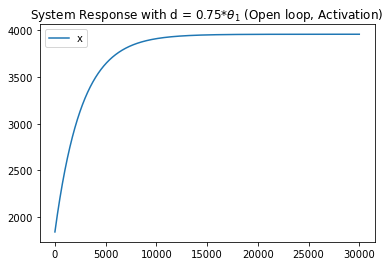

In [22]:

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.005 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.0005 #np.random.uniform(0, 2)
gamma_c = gamma_p #np.random.uniform(0, 2)
d = 0.75*theta_1
#d = 0

x_eq_open = mu_1/gamma_p


parameters_sample = (
    False, 
    True, 
    alpha, 
    theta_1, 
    gamma_p, 
    mu_1, 
    eta, 
    mu_2, 
    theta_2, 
    gamma_c,
    d)

initial_cond = [x_eq_open]
final_t = 30000
t_points = 5000
Us, ts = model_solve(open_loop, initial_cond, final_t, t_points, parameters_sample)
    
plt.plot(ts, Us, label = 'x')
plt.legend()
plt.title('System Response with d = 0.75*$\\theta_1$ (Open loop, Activation)')

Text(0.5, 1.0, 'System Response with d = 0.5 (Open loop)')

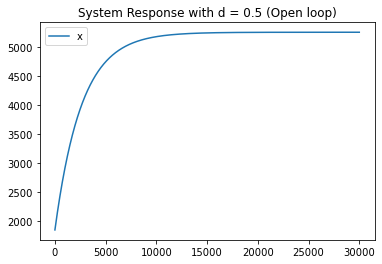

In [23]:

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.005 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.0005 #np.random.uniform(0, 2)
gamma_c = gamma_p #np.random.uniform(0, 2)
d = 0.5
#d = 0

x_eq_open = mu_1/gamma_p


parameters_sample = (
    False, 
    True, 
    alpha, 
    theta_1, 
    gamma_p, 
    mu_1, 
    eta, 
    mu_2, 
    theta_2, 
    gamma_c,
    d)

initial_cond = [x_eq_open]
final_t = 30000
t_points = 5000
Us_open, ts_open_notcircuit = model_solve(open_loop, initial_cond, final_t, t_points, parameters_sample)
    
plt.plot(ts_open_notcircuit, Us_open, label = 'x')
plt.legend()
plt.title('System Response with d = 0.5 (Open loop)')

<Figure size 720x720 with 0 Axes>

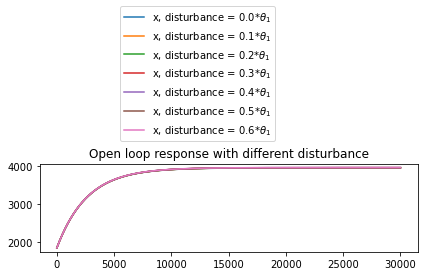

<Figure size 720x720 with 0 Axes>

In [24]:

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.005 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.0005 #np.random.uniform(0, 2)
gamma_c = gamma_p #np.random.uniform(0, 2)

#d = 0

x_eq_open = mu_1/gamma_p
for i in range(7):
    d = i/10*theta_1

    parameters_sample = (
        False, 
        True, 
        alpha, 
        theta_1, 
        gamma_p, 
        mu_1, 
        eta, 
        mu_2, 
        theta_2, 
        gamma_c,
        d)

    initial_cond = [x_eq_open]
    final_t = 30000
    t_points = 5000
    Us, ts = model_solve(open_loop, initial_cond, final_t, t_points, parameters_sample)
    plt.plot(ts, Us, label = f'x, disturbance = {i/10}*$\\theta_1$')
    plt.title('Open loop response with different disturbance')
    plt.legend(bbox_to_anchor=(0.2,1.2))
    plt.tight_layout()
plt.figure(figsize=(10, 10)) 

Text(0.5, 1.0, 'System Response with d = 0.5 (negative feedback loop)')

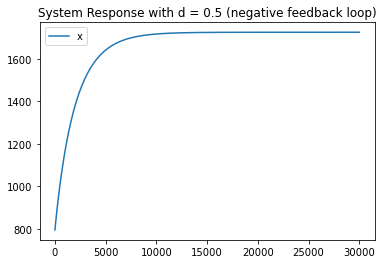

In [25]:
def negative_feedback(U, t, repression=False, degradation=False, alpha = 1, theta_1 = 1, gamma_p = 1, mu_1 = 1, eta = 1, mu_2 = 2, theta_2 = 1, gamma_c = 1, d = 1):
    
    x = U[0]
    dx =  mu_2/(theta_2 * x + 1) - gamma_p * x + d
    return dx


def model_solve(antithetic_model, initial_cond, final_t, t_points, parameters):

    U0 = initial_cond
    ts = np.linspace(0, final_t, t_points)
    
    Us = odeint(antithetic_model, U0, ts, args = parameters)
    return Us, ts


alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.05 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.005 #np.random.uniform(0, 2)
gamma_c = 0 #np.random.uniform(0, 2)
d = 0.5
#d = 0

x_eq_0_negfeedback = (-gamma_p + np.sqrt(gamma_p**2 + 4*gamma_p*theta_2*mu_2))/(2*gamma_p*theta_2)


parameters_sample = (
    True, 
    False, 
    alpha, 
    theta_1, 
    gamma_p, 
    mu_1, 
    eta, 
    mu_2, 
    theta_2, 
    gamma_c,
    d)

initial_cond = x_eq_0_negfeedback
final_t = 30000
t_points = 5000
Us_negfeedback, ts_negfeedback = model_solve(negative_feedback, initial_cond, final_t, t_points, parameters_sample)

    
plt.plot(ts_negfeedback, Us_negfeedback, label = 'x')
plt.legend()
plt.title('System Response with d = 0.5 (negative feedback loop)')


## Activation graph (degradation and non-degradation and open loop - normalised)

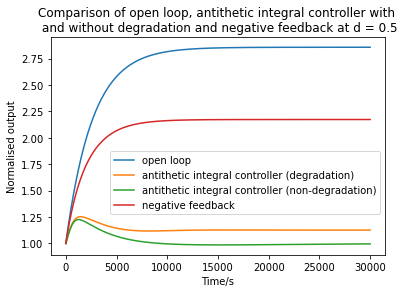

In [26]:
plt.plot(ts_open_notcircuit, np.array(Us_open)/x_eq_open, label = 'open loop')
plt.plot(ts_deg, np.array(Us_act_deg_x)/x_eq_00038, label = 'antithetic integral controller (degradation)')
plt.plot(ts_nodeg, np.array(Us_act_nodeg_x)/x_eq_0_nodeg, label = 'antithetic integral controller (non-degradation)')
plt.plot(ts_negfeedback, np.array(Us_negfeedback)/x_eq_0_negfeedback, label = 'negative feedback')
#plt.plot(ts, np.array(Us_open_x_circuit)/x_eq_0_open, label = 'circuit open loop')
plt.xlabel('Time/s')
plt.ylabel('Normalised output')
plt.legend(bbox_to_anchor=(1,0.5))
plt.title("Comparison of open loop, antithetic integral controller with \n and without degradation and negative feedback at d = 0.5")
plt.savefig("./write_up_svg/comparison.svg", bbox_inches = "tight")    

## Repression system response (non-degradation)

Text(0.5, 1.0, 'System Response with d = 0.5*$\\theta_1$ (Repression, non-degradation)')

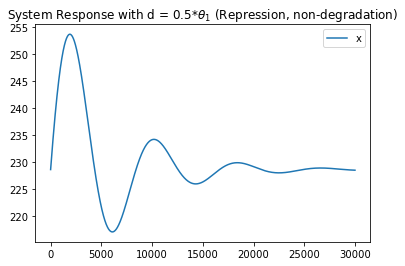

In [37]:

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.05 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.005 #np.random.uniform(0, 2)
gamma_c = 0 #np.random.uniform(0, 2)
d = 0.5*theta_1
#d = 0

x_eq_0_rep = (mu_2 - mu_1)/(mu_1*theta_2)
z1_eq_0_rep = (alpha*mu_1*theta_2 - mu_2*gamma_p + gamma_p*mu_1)/(gamma_p*theta_1*(mu_2 - mu_1))
z2_eq_0_rep = gamma_p*mu_1*theta_1*(mu_2 - mu_1)/(eta*(alpha*mu_1*theta_2 - mu_2*gamma_p + gamma_p*mu_1))


parameters_sample = (
    True, 
    False, 
    alpha, 
    theta_1, 
    gamma_p, 
    mu_1, 
    eta, 
    mu_2, 
    theta_2, 
    gamma_c,
    d)

initial_cond = [x_eq_0_rep, z1_eq_0_rep, z2_eq_0_rep]
final_t = 30000
t_points = 5000
Us, ts = model_solve(antithetic_model_d, initial_cond, final_t, t_points, parameters_sample)

Us_x = []
Us_z1 = []
Us_z2 = []

for k in range(len(Us)):
    Us_x.append(Us[k][0])
    Us_z1.append(Us[k][1])
    Us_z2.append(Us[k][2])
    
plt.plot(ts, Us_x, label = 'x')
#plt.plot(ts, Us_z1, label = 'z1')
#plt.plot(ts, Us_z2, label = 'z2')
plt.legend()
plt.title('System Response with d = 0.5*$\\theta_1$ (Repression, non-degradation)')

In [38]:
alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.005 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.0005 #np.random.uniform(0, 2)
gamma_c = 0 #np.random.uniform(0, 2)
d = 0.5*theta_1
#d = 0

x_eq_0_rep = (mu_2 - mu_1)/(mu_1*theta_2)
z1_eq_0_rep = (alpha*mu_1*theta_2 - mu_2*gamma_p + gamma_p*mu_1)/(gamma_p*theta_1*(mu_2 - mu_1))
z2_eq_0_rep = gamma_p*mu_1*theta_1*(mu_2 - mu_1)/(eta*(alpha*mu_1*theta_2 - mu_2*gamma_p + gamma_p*mu_1))

[x_eq_0_rep,z1_eq_0_rep,z2_eq_0_rep]

[2285.714285714286, -161.62280701754383, -14.436906377204888]

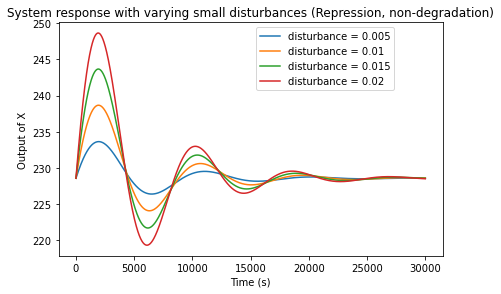

In [81]:

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.05 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.005 #np.random.uniform(0, 2)
gamma_c = 0 #np.random.uniform(0, 2)

#d = 0

x_eq_0_rep = (mu_2 - mu_1)/(mu_1*theta_2)
z1_eq_0_rep = (alpha*mu_1*theta_2 - mu_2*gamma_p + gamma_p*mu_1)/(gamma_p*theta_1*(mu_2 - mu_1))
z2_eq_0_rep = gamma_p*mu_1*theta_1*(mu_2 - mu_1)/(eta*(alpha*mu_1*theta_2 - mu_2*gamma_p + gamma_p*mu_1))

for i in range(1,5,1):
    d = i/10*theta_1

    parameters_sample = (
        True, 
        False, 
        alpha, 
        theta_1, 
        gamma_p, 
        mu_1, 
        eta, 
        mu_2, 
        theta_2, 
        gamma_c,
        d)

    initial_cond = [x_eq_0_rep, z1_eq_0_rep, z2_eq_0_rep]
    final_t = 30000
    t_points = 5000
    Us, ts = model_solve(antithetic_model_d, initial_cond, final_t, t_points, parameters_sample)

    Us_x = []
    Us_z1 = []
    Us_z2 = []

    for k in range(len(Us)):
        Us_x.append(Us[k][0])
        Us_z1.append(Us[k][1])
        Us_z2.append(Us[k][2])
    d_show = round(i/10*theta_1,3)
    plt.plot(ts, Us_x, label = f'disturbance = {d_show}')
    #plt.plot(ts, Us_z1, label = 'z1')
    #plt.plot(ts, Us_z2, label = 'z2')
    plt.title('System response with varying small disturbances (Repression, non-degradation)')
    plt.legend(bbox_to_anchor=(0.5,1))
    plt.tight_layout()
plt.xlabel('Time (s)')
plt.ylabel('Output of X')
plt.savefig("./write_up_svg/rep_nodeg_response_d_small.svg", bbox_inches = "tight")  



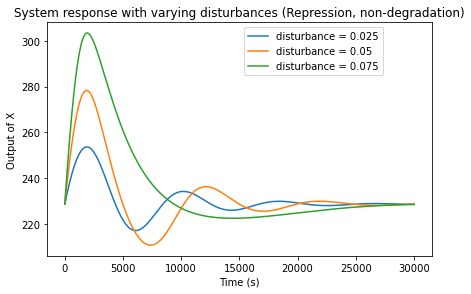

In [82]:

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.05 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.005 #np.random.uniform(0, 2)
gamma_c = 0 #np.random.uniform(0, 2)

#d = 0

x_eq_0_rep = (mu_2 - mu_1)/(mu_1*theta_2)
z1_eq_0_rep = (alpha*mu_1*theta_2 - mu_2*gamma_p + gamma_p*mu_1)/(gamma_p*theta_1*(mu_2 - mu_1))
z2_eq_0_rep = gamma_p*mu_1*theta_1*(mu_2 - mu_1)/(eta*(alpha*mu_1*theta_2 - mu_2*gamma_p + gamma_p*mu_1))

for i in range(1,4,1):
    d = i/10*0.25

    parameters_sample = (
        True, 
        False, 
        alpha, 
        theta_1, 
        gamma_p, 
        mu_1, 
        eta, 
        mu_2, 
        theta_2, 
        gamma_c,
        d)

    initial_cond = [x_eq_0_rep, z1_eq_0_rep, z2_eq_0_rep]
    final_t = 30000
    t_points = 5000
    Us, ts = model_solve(antithetic_model_d, initial_cond, final_t, t_points, parameters_sample)

    Us_x = []
    Us_z1 = []
    Us_z2 = []

    for k in range(len(Us)):
        Us_x.append(Us[k][0])
        Us_z1.append(Us[k][1])
        Us_z2.append(Us[k][2])
    d_show = round(i/10*0.25,3)
    plt.plot(ts, Us_x, label = f'disturbance = {d_show}')
    #plt.plot(ts, Us_z1, label = 'z1')
    #plt.plot(ts, Us_z2, label = 'z2')
    plt.title('System response with varying disturbances (Repression, non-degradation)')
    plt.legend(bbox_to_anchor=(0.5,1))
    plt.tight_layout()
plt.xlabel('Time (s)')
plt.ylabel('Output of X')
plt.savefig("./write_up_svg/rep_nodeg_response_d.svg", bbox_inches = "tight")  

## Repression integrator (non-degradation)

Text(0.5, 1.0, 'Integrator with d = 0.5*$\\theta_1$ (Repression, non-degradation)')

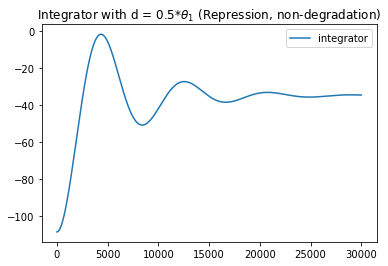

In [56]:

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.05 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.005 #np.random.uniform(0, 2)
gamma_c = 0 #np.random.uniform(0, 2)
d = 0.5*theta_1
#d = 0

x_eq_0_rep = (mu_2 - mu_1)/(mu_1*theta_2)
z1_eq_0_rep = (alpha*mu_1*theta_2 - mu_2*gamma_p + gamma_p*mu_1)/(gamma_p*theta_1*(mu_2 - mu_1))
z2_eq_0_rep = gamma_p*mu_1*theta_1*(mu_2 - mu_1)/(eta*(alpha*mu_1*theta_2 - mu_2*gamma_p + gamma_p*mu_1))
q1_rep = z1_eq_0_rep - z2_eq_0_rep
q2_rep = z1_eq_0_rep + z2_eq_0_rep

parameters_sample = (
    True, 
    False, 
    alpha, 
    theta_1, 
    gamma_p, 
    mu_1, 
    eta, 
    mu_2, 
    theta_2, 
    gamma_c,
    d)

initial_cond = [x_eq_0_rep, q1_rep, q2_rep]
final_t = 30000
t_points = 5000
Us, ts = model_solve(antithetic_model_integrator, initial_cond, final_t, t_points, parameters_sample)

Us_x = []
Us_q1 = []
Us_q2 = []

for k in range(len(Us)):
    Us_x.append(Us[k][0])
    Us_q1.append(Us[k][1])
    Us_q2.append(Us[k][2])
    
#plt.plot(ts, Us_x, label = 'x')
plt.plot(ts, Us_q1, label = 'integrator')
#plt.plot(ts, Us_q2, label = 'q2')
plt.legend()
plt.title('Integrator with d = 0.5*$\\theta_1$ (Repression, non-degradation)')

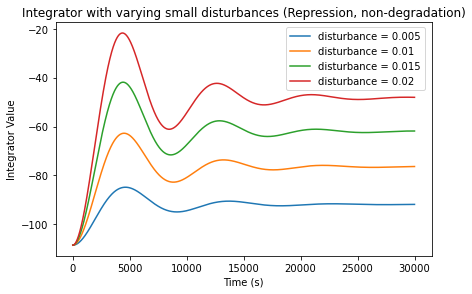

In [83]:

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.05 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.005 #np.random.uniform(0, 2)
gamma_c = 0 #np.random.uniform(0, 2)

#d = 0

x_eq_0_rep = (mu_2 - mu_1)/(mu_1*theta_2)
z1_eq_0_rep = (alpha*mu_1*theta_2 - mu_2*gamma_p + gamma_p*mu_1)/(gamma_p*theta_1*(mu_2 - mu_1))
z2_eq_0_rep = gamma_p*mu_1*theta_1*(mu_2 - mu_1)/(eta*(alpha*mu_1*theta_2 - mu_2*gamma_p + gamma_p*mu_1))
q1_rep = z1_eq_0_rep - z2_eq_0_rep
q2_rep = z1_eq_0_rep + z2_eq_0_rep

for i in range(1,5,1):
    d = i/10*theta_1

    parameters_sample = (
        True, 
        False, 
        alpha, 
        theta_1, 
        gamma_p, 
        mu_1, 
        eta, 
        mu_2, 
        theta_2, 
        gamma_c,
        d)

    initial_cond = [x_eq_0_rep, q1_rep, q2_rep]
    final_t = 30000
    t_points = 5000
    Us, ts = model_solve(antithetic_model_integrator, initial_cond, final_t, t_points, parameters_sample)

    Us_x = []
    Us_q1 = []
    Us_q2 = []

    for k in range(len(Us)):
        Us_x.append(Us[k][0])
        Us_q1.append(Us[k][1])
        Us_q2.append(Us[k][2])
    d_show = round(i/10*theta_1,3)
    #plt.plot(ts, Us_x, label = 'x')
    plt.plot(ts, Us_q1, label = f'disturbance = {d_show}')
    #plt.plot(ts, Us_q2, label = 'q2')
    plt.legend()
    plt.title('Integrator with varying small disturbances (Repression, non-degradation)')
    plt.legend(bbox_to_anchor=(0.6,1))
    plt.tight_layout()
plt.xlabel('Time (s)')
plt.ylabel('Integrator Value')
plt.savefig("./write_up_svg/rep_nodeg_integrator_d_small.svg", bbox_inches = "tight")  

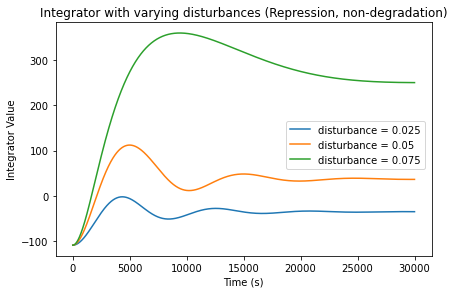

In [84]:

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.05 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.005 #np.random.uniform(0, 2)
gamma_c = 0 #np.random.uniform(0, 2)

#d = 0

x_eq_0_rep = (mu_2 - mu_1)/(mu_1*theta_2)
z1_eq_0_rep = (alpha*mu_1*theta_2 - mu_2*gamma_p + gamma_p*mu_1)/(gamma_p*theta_1*(mu_2 - mu_1))
z2_eq_0_rep = gamma_p*mu_1*theta_1*(mu_2 - mu_1)/(eta*(alpha*mu_1*theta_2 - mu_2*gamma_p + gamma_p*mu_1))
q1_rep = z1_eq_0_rep - z2_eq_0_rep
q2_rep = z1_eq_0_rep + z2_eq_0_rep

for i in range(1,4,1):
    d = i/10*0.25

    parameters_sample = (
        True, 
        False, 
        alpha, 
        theta_1, 
        gamma_p, 
        mu_1, 
        eta, 
        mu_2, 
        theta_2, 
        gamma_c,
        d)

    initial_cond = [x_eq_0_rep, q1_rep, q2_rep]
    final_t = 30000
    t_points = 5000
    Us, ts = model_solve(antithetic_model_integrator, initial_cond, final_t, t_points, parameters_sample)

    Us_x = []
    Us_q1 = []
    Us_q2 = []

    for k in range(len(Us)):
        Us_x.append(Us[k][0])
        Us_q1.append(Us[k][1])
        Us_q2.append(Us[k][2])
    d_show = round(i/10*0.25,3)
    #plt.plot(ts, Us_x, label = 'x')
    plt.plot(ts, Us_q1, label = f'disturbance = {d_show}')
    #plt.plot(ts, Us_q2, label = 'q2')
    plt.legend()
    plt.title('Integrator with varying disturbances (Repression, non-degradation)')
    plt.legend(bbox_to_anchor=(0.6,0.6))
    plt.tight_layout()
plt.xlabel('Time (s)')
plt.ylabel('Integrator Value')
plt.savefig("./write_up_svg/rep_nodeg_integrator_d.svg", bbox_inches = "tight")  

## Repression system response (degradation)

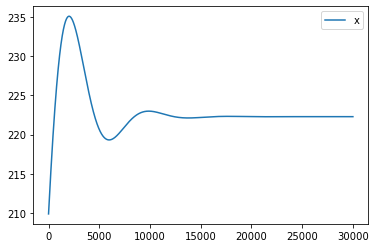

In [66]:

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.05 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.005 #np.random.uniform(0, 2)
gamma_c = gamma_p #np.random.uniform(0, 2)
d = 0.5*theta_1
#d = 0

x_eq_rep_00038 = 209.88125683027403
z1_eq_rep_00038 = 21.794726966281953
z2_eq_rep_00038 = 105.79286828154224


parameters_sample = (
    True, 
    True, 
    alpha, 
    theta_1, 
    gamma_p, 
    mu_1, 
    eta, 
    mu_2, 
    theta_2, 
    gamma_c,
    d)

initial_cond = [x_eq_rep_00038, z1_eq_rep_00038, z2_eq_rep_00038]
final_t = 30000
t_points = 5000
Us, ts = model_solve(antithetic_model_d, initial_cond, final_t, t_points, parameters_sample)

Us_x = []
Us_z1 = []
Us_z2 = []

for k in range(len(Us)):
    Us_x.append(Us[k][0])
    Us_z1.append(Us[k][1])
    Us_z2.append(Us[k][2])
    
plt.plot(ts, Us_x, label = 'x')
#plt.plot(ts, Us_z1, label = 'z1')
#plt.plot(ts, Us_z2, label = 'z2')
plt.legend()


Text(0.5, 1.0, 'System Response with d = 0.5*$\\theta_1$ (Repression, degradation)')

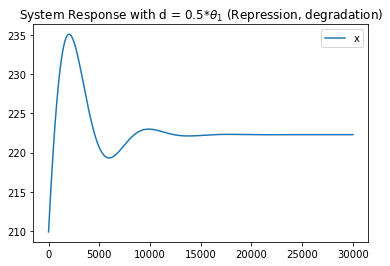

In [67]:

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.05 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.005 #np.random.uniform(0, 2)
gamma_c = gamma_p #np.random.uniform(0, 2)
d = 0.5*theta_1
#d = 0

x_eq_rep_00038 = 209.88125683027403
z1_eq_rep_00038 = 21.794726966281953
z2_eq_rep_00038 = 105.79286828154224


parameters_sample = (
    True, 
    True, 
    alpha, 
    theta_1, 
    gamma_p, 
    mu_1, 
    eta, 
    mu_2, 
    theta_2, 
    gamma_c,
    d)

initial_cond = [x_eq_rep_00038, z1_eq_rep_00038, z2_eq_rep_00038]
final_t = 30000
t_points = 5000
Us, ts = model_solve(antithetic_model_d, initial_cond, final_t, t_points, parameters_sample)

Us_x = []
Us_z1 = []
Us_z2 = []

for k in range(len(Us)):
    Us_x.append(Us[k][0])
    Us_z1.append(Us[k][1])
    Us_z2.append(Us[k][2])
    
plt.plot(ts, Us_x, label = 'x')
#plt.plot(ts, Us_z1, label = 'z1')
#plt.plot(ts, Us_z2, label = 'z2')
plt.legend()
plt.title('System Response with d = 0.5*$\\theta_1$ (Repression, degradation)')

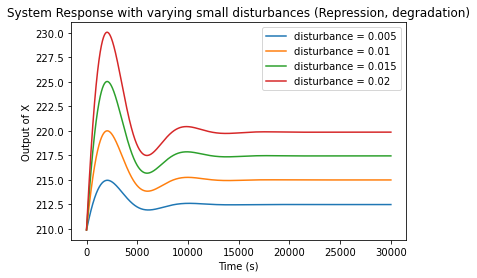

In [85]:

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.05 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.005 #np.random.uniform(0, 2)
gamma_c = gamma_p #np.random.uniform(0, 2)

#d = 0

x_eq_rep_00038 = 209.88125683027403
z1_eq_rep_00038 = 21.794726966281953
z2_eq_rep_00038 = 105.79286828154224

for i in range(1,5,1):
    d = i/10*theta_1

    parameters_sample = (
        True, 
        True, 
        alpha, 
        theta_1, 
        gamma_p, 
        mu_1, 
        eta, 
        mu_2, 
        theta_2, 
        gamma_c,
        d)

    initial_cond = [x_eq_rep_00038, z1_eq_rep_00038, z2_eq_rep_00038]
    final_t = 30000
    t_points = 5000
    Us, ts = model_solve(antithetic_model_d, initial_cond, final_t, t_points, parameters_sample)

    Us_x = []
    Us_z1 = []
    Us_z2 = []

    for k in range(len(Us)):
        Us_x.append(Us[k][0])
        Us_z1.append(Us[k][1])
        Us_z2.append(Us[k][2])
    d_show = round(i/10*theta_1,3)
    plt.plot(ts, Us_x, label = f'disturbance = {d_show}')
    #plt.plot(ts, Us_z1, label = 'z1')
    #plt.plot(ts, Us_z2, label = 'z2')
    plt.legend()
    plt.xlabel('Time (s)')
    plt.ylabel('Output of X')
    plt.title('System Response with varying small disturbances (Repression, degradation)')
plt.savefig("./write_up_svg/rep_deg_response_d_small.svg", bbox_inches = "tight")  

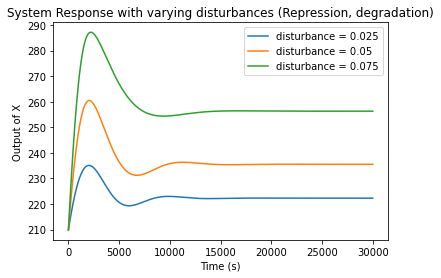

In [86]:

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.05 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.005 #np.random.uniform(0, 2)
gamma_c = gamma_p #np.random.uniform(0, 2)

#d = 0

x_eq_rep_00038 = 209.88125683027403
z1_eq_rep_00038 = 21.794726966281953
z2_eq_rep_00038 = 105.79286828154224

for i in range(1,4,1):
    d = i/10*0.25

    parameters_sample = (
        True, 
        True, 
        alpha, 
        theta_1, 
        gamma_p, 
        mu_1, 
        eta, 
        mu_2, 
        theta_2, 
        gamma_c,
        d)

    initial_cond = [x_eq_rep_00038, z1_eq_rep_00038, z2_eq_rep_00038]
    final_t = 30000
    t_points = 5000
    Us, ts = model_solve(antithetic_model_d, initial_cond, final_t, t_points, parameters_sample)

    Us_x = []
    Us_z1 = []
    Us_z2 = []

    for k in range(len(Us)):
        Us_x.append(Us[k][0])
        Us_z1.append(Us[k][1])
        Us_z2.append(Us[k][2])
    d_show = round(i/10*0.25,3)
    plt.plot(ts, Us_x, label = f'disturbance = {d_show}')
    #plt.plot(ts, Us_z1, label = 'z1')
    #plt.plot(ts, Us_z2, label = 'z2')
    plt.legend()
    plt.xlabel('Time (s)')
    plt.ylabel('Output of X')
    plt.title('System Response with varying disturbances (Repression, degradation)')
plt.savefig("./write_up_svg/rep_deg_response_d.svg", bbox_inches = "tight")  

## Repression integrator (degradation)

Text(0.5, 1.0, 'integrator with d = 0.5*$\\theta_1$ (Repression, degradation)')

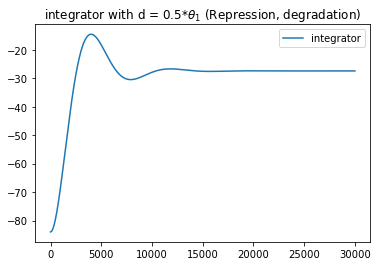

In [73]:

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.05 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.005 #np.random.uniform(0, 2)
gamma_c = gamma_p #np.random.uniform(0, 2)
d = 0.5*theta_1
#d = 0

x_eq_rep_00038 = 209.88125683027403
z1_eq_rep_00038 = 21.794726966281953
z2_eq_rep_00038 = 105.79286828154224
q1_rep_00038 = z1_eq_rep_00038 - z2_eq_rep_00038
q2_rep_00038 = z1_eq_rep_00038 + z2_eq_rep_00038


parameters_sample = (
    True, 
    True, 
    alpha, 
    theta_1, 
    gamma_p, 
    mu_1, 
    eta, 
    mu_2, 
    theta_2, 
    gamma_c,
    d)

initial_cond = [x_eq_rep_00038, q1_rep_00038, q2_rep_00038]
final_t = 30000
t_points = 5000
Us, ts = model_solve(antithetic_model_integrator, initial_cond, final_t, t_points, parameters_sample)

Us_x = []
Us_q1 = []
Us_q2 = []

for k in range(len(Us)):
    Us_x.append(Us[k][0])
    Us_q1.append(Us[k][1])
    Us_q2.append(Us[k][2])
    
#plt.plot(ts, Us_x, label = 'x')
plt.plot(ts, Us_q1, label = 'integrator')
#plt.plot(ts, Us_q2, label = 'z2')
plt.legend()
plt.title('integrator with d = 0.5*$\\theta_1$ (Repression, degradation)')

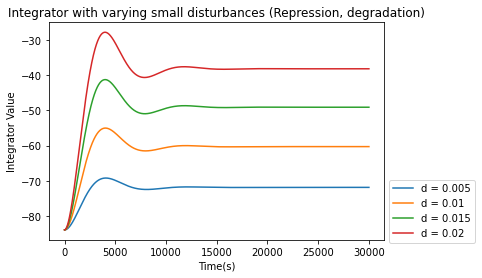

In [87]:

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.05 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.005 #np.random.uniform(0, 2)
gamma_c = gamma_p #np.random.uniform(0, 2)

#d = 0

x_eq_rep_00038 = 209.88125683027403
z1_eq_rep_00038 = 21.794726966281953
z2_eq_rep_00038 = 105.79286828154224
q1_rep_00038 = z1_eq_rep_00038 - z2_eq_rep_00038
q2_rep_00038 = z1_eq_rep_00038 + z2_eq_rep_00038


for i in range(1,5,1):
    d = i/10*theta_1
    parameters_sample = (
        True, 
        True, 
        alpha, 
        theta_1, 
        gamma_p, 
        mu_1, 
        eta, 
        mu_2, 
        theta_2, 
        gamma_c,
        d)

    initial_cond = [x_eq_rep_00038, q1_rep_00038, q2_rep_00038]
    final_t = 30000
    t_points = 5000
    Us, ts = model_solve(antithetic_model_integrator, initial_cond, final_t, t_points, parameters_sample)

    Us_x = []
    Us_q1 = []
    Us_q2 = []

    for k in range(len(Us)):
        Us_x.append(Us[k][0])
        Us_q1.append(Us[k][1])
        Us_q2.append(Us[k][2])
    d_show = round(i/10*theta_1,3)
    #plt.plot(ts, Us_x, label = 'x')
    plt.plot(ts, Us_q1, label = f'd = {d_show}')
    #plt.plot(ts, Us_q2, label = 'z2')
    plt.legend(bbox_to_anchor=(1,0.3))
    plt.ylabel('Integrator Value')
    plt.xlabel('Time(s)')
    plt.title('Integrator with varying small disturbances (Repression, degradation)')
plt.savefig("./write_up_svg/rep_deg_integrator_d_small.svg", bbox_inches = "tight")  

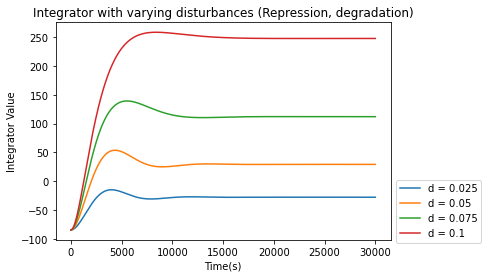

In [89]:

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.05 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.005 #np.random.uniform(0, 2)
gamma_c = gamma_p #np.random.uniform(0, 2)

#d = 0

x_eq_rep_00038 = 209.88125683027403
z1_eq_rep_00038 = 21.794726966281953
z2_eq_rep_00038 = 105.79286828154224
q1_rep_00038 = z1_eq_rep_00038 - z2_eq_rep_00038
q2_rep_00038 = z1_eq_rep_00038 + z2_eq_rep_00038


for i in range(1,5,1):
    d = i/10*0.25
    parameters_sample = (
        True, 
        True, 
        alpha, 
        theta_1, 
        gamma_p, 
        mu_1, 
        eta, 
        mu_2, 
        theta_2, 
        gamma_c,
        d)

    initial_cond = [x_eq_rep_00038, q1_rep_00038, q2_rep_00038]
    final_t = 30000
    t_points = 5000
    Us, ts = model_solve(antithetic_model_integrator, initial_cond, final_t, t_points, parameters_sample)

    Us_x = []
    Us_q1 = []
    Us_q2 = []

    for k in range(len(Us)):
        Us_x.append(Us[k][0])
        Us_q1.append(Us[k][1])
        Us_q2.append(Us[k][2])
    d_show = round(i/10*0.25,3)
    #plt.plot(ts, Us_x, label = 'x')
    plt.plot(ts, Us_q1, label = f'd = {d_show}')
    #plt.plot(ts, Us_q2, label = 'z2')
    plt.legend(bbox_to_anchor=(1,0.3))
    plt.ylabel('Integrator Value')
    plt.xlabel('Time(s)')
    plt.title('Integrator with varying disturbances (Repression, degradation)')
plt.savefig("./write_up_svg/rep_deg_integrator_d.svg", bbox_inches = "tight")  

## Negative feedback loop

In [27]:
def negative_feedback(U, t, repression=False, degradation=False, alpha = 1, theta_1 = 1, gamma_p = 1, mu_1 = 1, eta = 1, mu_2 = 2, theta_2 = 1, gamma_c = 1, d = 1):
    
    x = U[0]
    dx =  mu_2/(theta_2 * x + 1) - gamma_p * x + d
    return dx


def model_solve(antithetic_model, initial_cond, final_t, t_points, parameters):

    U0 = initial_cond
    ts = np.linspace(0, final_t, t_points)
    
    Us = odeint(antithetic_model, U0, ts, args = parameters)
    return Us, ts


alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.05 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.005 #np.random.uniform(0, 2)
gamma_c = 0 #np.random.uniform(0, 2)
d = 0.5
#d = 0

x_eq_0_negfeedback = (-gamma_p + np.sqrt(gamma_p**2 + 4*gamma_p*theta_2*mu_2))/(2*gamma_p*theta_2)


parameters_sample = (
    True, 
    False, 
    alpha, 
    theta_1, 
    gamma_p, 
    mu_1, 
    eta, 
    mu_2, 
    theta_2, 
    gamma_c,
    d)

initial_cond = x_eq_0_negfeedback
final_t = 30000
t_points = 5000
Us_negfeedback, ts_negfeedback = model_solve(negative_feedback, initial_cond, final_t, t_points, parameters_sample)

    
plt.plot(ts_negfeedback, Us_negfeedback, label = 'x')
plt.legend()
plt.title('System Response with d = 0.5 (negative feedback loop)')


Text(0.5, 1.0, 'System Response with d = 0.75*$\\theta_1$ (negative feedback loop)')

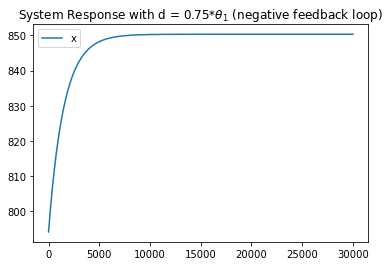

In [28]:

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.05 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.005 #np.random.uniform(0, 2)
gamma_c = 0 #np.random.uniform(0, 2)
d = 0.75*theta_1
#d = 0

x_eq_0_negfeedback = (-gamma_p + np.sqrt(gamma_p**2 + 4*gamma_p*theta_2*mu_2))/(2*gamma_p*theta_2)


parameters_sample = (
    True, 
    False, 
    alpha, 
    theta_1, 
    gamma_p, 
    mu_1, 
    eta, 
    mu_2, 
    theta_2, 
    gamma_c,
    d)

initial_cond = x_eq_0_negfeedback
final_t = 30000
t_points = 5000
Us_negfeedback, ts = model_solve(negative_feedback, initial_cond, final_t, t_points, parameters_sample)

    
plt.plot(ts, Us_negfeedback, label = 'x')
plt.legend()
plt.title('System Response with d = 0.75*$\\theta_1$ (negative feedback loop)')



Text(0.5, 1.0, 'System Response with d = 0.5 (negative feedback loop)')

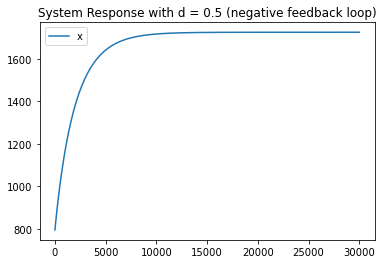

In [29]:

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.05 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.005 #np.random.uniform(0, 2)
gamma_c = 0 #np.random.uniform(0, 2)
d = 0.5
#d = 0

x_eq_0_negfeedback = (-gamma_p + np.sqrt(gamma_p**2 + 4*gamma_p*theta_2*mu_2))/(2*gamma_p*theta_2)


parameters_sample = (
    True, 
    False, 
    alpha, 
    theta_1, 
    gamma_p, 
    mu_1, 
    eta, 
    mu_2, 
    theta_2, 
    gamma_c,
    d)

initial_cond = x_eq_0_negfeedback
final_t = 30000
t_points = 5000
Us_negfeedback, ts_negfeedback = model_solve(negative_feedback, initial_cond, final_t, t_points, parameters_sample)

    
plt.plot(ts_negfeedback, Us_negfeedback, label = 'x')
plt.legend()
plt.title('System Response with d = 0.5 (negative feedback loop)')


Text(0.5, 1.0, 'System Response with d = 0.5 (negative feedback loop)')

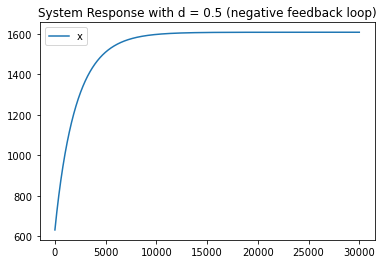

In [30]:

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.05 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1
mu_1 = 0.7
theta_2 = 0.005 #np.random.uniform(0, 2)
gamma_c = 0 #np.random.uniform(0, 2)
d = 0.5
#d = 0

x_eq_0_negfeedback_small = (-gamma_p + np.sqrt(gamma_p**2 + 4*gamma_p*theta_2*mu_2))/(2*gamma_p*theta_2)


parameters_sample = (
    True, 
    False, 
    alpha, 
    theta_1, 
    gamma_p, 
    mu_1, 
    eta, 
    mu_2, 
    theta_2, 
    gamma_c,
    d)

initial_cond = x_eq_0_negfeedback_small
final_t = 30000
t_points = 5000
Us_negfeedback_small, ts = model_solve(negative_feedback, initial_cond, final_t, t_points, parameters_sample)

    
plt.plot(ts, Us_negfeedback_small, label = 'x')
plt.legend()
plt.title('System Response with d = 0.5 (negative feedback loop)')



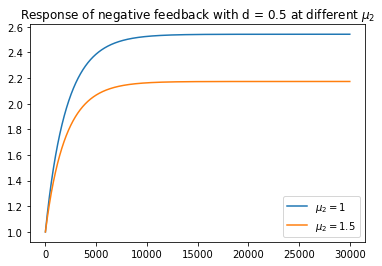

In [31]:
plt.plot(ts, np.array(Us_negfeedback_small)/x_eq_0_negfeedback_small, label = '$\mu_2 = 1$')
plt.plot(ts, np.array(Us_negfeedback)/x_eq_0_negfeedback, label = '$\mu_2 = 1.5$')
plt.title('Response of negative feedback with d = 0.5 at different $\mu_2$')
plt.legend()
plt.savefig("compare_negfeedback.svg")

## Comparing to linearised system

In [91]:
import pandas as pd

In [92]:
matlab_graph = pd.read_csv('matlab_graph.csv')  

In [93]:
t = matlab_graph.iloc[:, 0]
step = matlab_graph.iloc[:, 1]
t_small = matlab_graph.iloc[:,2]
step_small = matlab_graph.iloc[:,3]

Text(0.5, 1.0, 'System Response with d = 0.5 (Activation, non-degradation)')

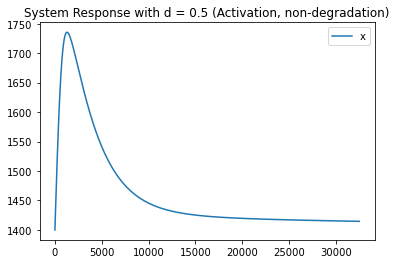

In [94]:

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.005 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.0005 #np.random.uniform(0, 2)
gamma_c = 0 #np.random.uniform(0, 2)
d = 0.525
#d = 0

x_eq_0_nodeg = mu_1/theta_2
z1_eq_0_nodeg = gamma_p * mu_1/(theta_1 * theta_2)
z2_eq_0_nodeg = theta_1 * theta_2 / (eta * gamma_p)


parameters_sample = (
    False, 
    False, 
    alpha, 
    theta_1, 
    gamma_p, 
    mu_1, 
    eta, 
    mu_2, 
    theta_2, 
    gamma_c,
    d)

initial_cond = [x_eq_0_nodeg, z1_eq_0_nodeg, z2_eq_0_nodeg]
final_t = 32500
t_points = 5000
Us, ts = model_solve(antithetic_model_d, initial_cond, final_t, t_points, parameters_sample)

Us_act_nodeg_x = []
Us_act_nodeg_z1 = []
Us_act_nodeg_z2 = []

for k in range(len(Us)):
    Us_act_nodeg_x.append(Us[k][0])
    Us_act_nodeg_z1.append(Us[k][1])
    Us_act_nodeg_z2.append(Us[k][2])
    
plt.plot(ts, Us_act_nodeg_x, label = 'x')
#plt.plot(ts, Us_z1, label = 'z1')
#plt.plot(ts, Us_z2, label = 'z2')
plt.legend()
plt.title('System Response with d = 0.5 (Activation, non-degradation)')

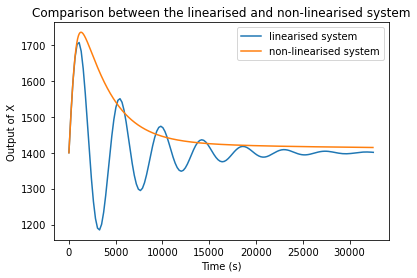

In [95]:
plt.plot(t, step, label = 'linearised system')
plt.plot(ts, Us_act_nodeg_x, label = 'non-linearised system')
plt.legend()
plt.title('Comparison between the linearised and non-linearised system')
plt.ylabel('Output of X')
plt.xlabel('Time (s)')
plt.savefig("./write_up_svg/lin_nonlin.svg", bbox_inches = "tight")  

Text(0.5, 1.0, 'System Response with d = 0.5 (Activation, non-degradation)')

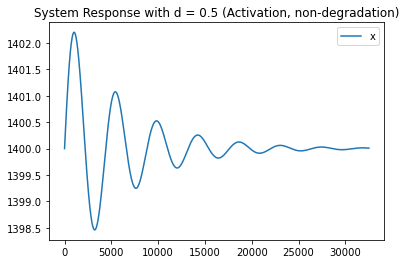

In [97]:

alpha = 10/60 #np.random.uniform(0, 2)
theta_1 = 0.005 #np.random.uniform(0, 2)
gamma_p =  0.00038 #np.random.uniform(0, 2)
eta = 0.018/60 #np.random.uniform(0, 2)
mu_2 = 1.5
mu_1 = 0.7
theta_2 = 0.0005 #np.random.uniform(0, 2)
gamma_c = 0 #np.random.uniform(0, 2)
d = 0.75*theta_1
#d = 0

x_eq_0_nodeg = mu_1/theta_2
z1_eq_0_nodeg = gamma_p * mu_1/(theta_1 * theta_2)
z2_eq_0_nodeg = theta_1 * theta_2 / (eta * gamma_p)


parameters_sample = (
    False, 
    False, 
    alpha, 
    theta_1, 
    gamma_p, 
    mu_1, 
    eta, 
    mu_2, 
    theta_2, 
    gamma_c,
    d)

initial_cond = [x_eq_0_nodeg, z1_eq_0_nodeg, z2_eq_0_nodeg]
final_t = 32500
t_points = 5000
Us, ts = model_solve(antithetic_model_d, initial_cond, final_t, t_points, parameters_sample)

Us_act_nodeg_x = []
Us_act_nodeg_z1 = []
Us_act_nodeg_z2 = []

for k in range(len(Us)):
    Us_act_nodeg_x.append(Us[k][0])
    Us_act_nodeg_z1.append(Us[k][1])
    Us_act_nodeg_z2.append(Us[k][2])
    
plt.plot(ts, Us_act_nodeg_x, label = 'x')
#plt.plot(ts, Us_z1, label = 'z1')
#plt.plot(ts, Us_z2, label = 'z2')
plt.legend()
plt.title('System Response with d = 0.5 (Activation, non-degradation)')
 

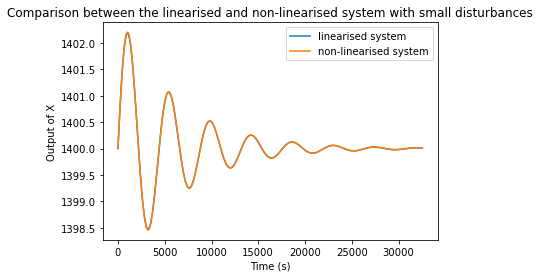

In [98]:
plt.plot(t_small, step_small, label = 'linearised system')
plt.plot(ts, Us_act_nodeg_x, label = 'non-linearised system')
plt.legend()
plt.title('Comparison between the linearised and non-linearised system with small disturbances')
plt.ylabel('Output of X')
plt.xlabel('Time (s)')
plt.savefig("./write_up_svg/lin_nonlin_small.svg", bbox_inches = "tight") 